## House Prices Projects (Kaggle)
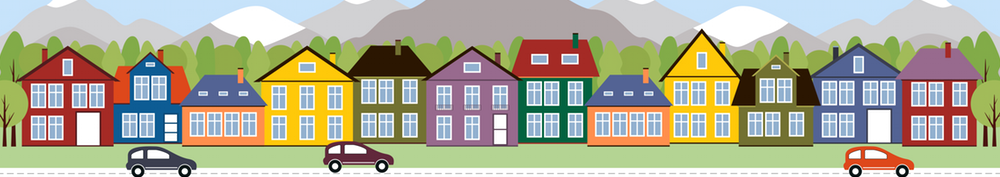
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenge is to predict the final price of each home.

In [3]:
#Importing Pandas
import pandas as pd

In [4]:
#importing train dataset
base = pd.read_csv('train.csv')

In [5]:
#view
base.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [6]:
#acquiring the shape of database
base.shape

(1460, 81)

In [7]:
#and the info
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Starting to explore the data

In [14]:
#visualizing the number of null values
(base.isnull().sum()/base.shape[0]).sort_values(ascending = False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [15]:
#we can drop the columns with more than 10% null values
eliminate = base.columns[(base.isnull().sum()/base.shape[0]) > 0.1]
eliminate

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [16]:
#dropping the columns
base = base.drop(eliminate, axis = 1)

In [17]:
#visualizing the number of null values
(base.isnull().sum()/base.shape[0]).sort_values(ascending = False).head(20)

GarageType      0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
WoodDeckSF      0.000000
PavedDrive      0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
BsmtFullBath    0.000000
BsmtHalfBath    0.000000
FullBath        0.000000
HalfBath        0.000000
dtype: float64

#### I want to create a first model to see how much I'm getting wrong and then plan how to improve. To do this:
<ul>
<li>I need to <strong>delete the text columns</strong></li>
<li>I need to <strong>treat null values</strong></li>
<li>I'm going to <strong>choose some algorithms to test and an error evaluation method</strong></li>
</ul>

In [21]:
#selecting only numerical data
col = base.columns[base.dtypes != 'object']
col

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [22]:
#and create a new base with these values
base2 = base.loc[:, col]
base2.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [24]:
#checking for null values
base2.isnull().sum().sort_values(ascending = False).head(3)

GarageYrBlt    81
MasVnrArea      8
Id              0
dtype: int64

In [25]:
#replacing null values with -1
base2 = base2.fillna(-1)

##### This will be the initial basis for getting started

#### Creating the model

##### I'll separate it into training and testing using scikit-learn

In [26]:
#Selecting X e y
X = base2.drop('SalePrice', axis = 1)
y = base2.SalePrice

In [27]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [28]:
#separating this base into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### The next step is to select the algorithms I'm going to use. I'll start with the simplest algorithms such as:
<ul>
<li>Linear Regression</li>
<li>Regression Tree</li>
<li>KNeighborsRegressor</li>
</ul>

In [31]:
#importing Linear Regression
from sklearn.linear_model import LinearRegression

In [33]:
#creating the regressor and fit with training data
reg_lr = LinearRegression().fit(X_train, y_train)

In [34]:
#prediction of the test data
y_lr = reg_lr.predict(X_test)

In [35]:
#importing Regression Tree
from sklearn import tree

In [39]:
#creating the regressor and fit with training data
reg_rt = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [37]:
#making the prediction
y_rt = reg_rt.predict(X_test)

In [38]:
#importing KNN
from sklearn.neighbors import KNeighborsRegressor

In [40]:
#creating the regressor and fit with training data
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [44]:
#making the prediction
y_knn = reg_knn.predict(X_test)

#I was having a problem with the automatic detection of cores, so I had to follow the steps below
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '8'

##### And evaluate this data, using both absolute and quadratic error

In [42]:
#importing mean absolute error and mean squared error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [45]:
#evaluating the regression error
print(mean_absolute_error(y_test, y_lr))
print(mean_squared_error(y_test, y_lr))

23763.187393064058
1533982883.444886


In [46]:
#evaluating the Regression Tree error
print(mean_absolute_error(y_test, y_rt))
print(mean_squared_error(y_test, y_rt))

27580.78838174274
2530245114.701245


In [47]:
#evaluating the KNN error
print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error(y_test, y_knn))

33273.08298755187
2733937586.841286


#### I'm going to visually plot the relationship between the y_test and the predictions made
<ul>
    <li>I will use <strong>matplotlib</strong> to do this</li>
</ul>

In [48]:
#importing matplotlib
import matplotlib.pyplot as plt

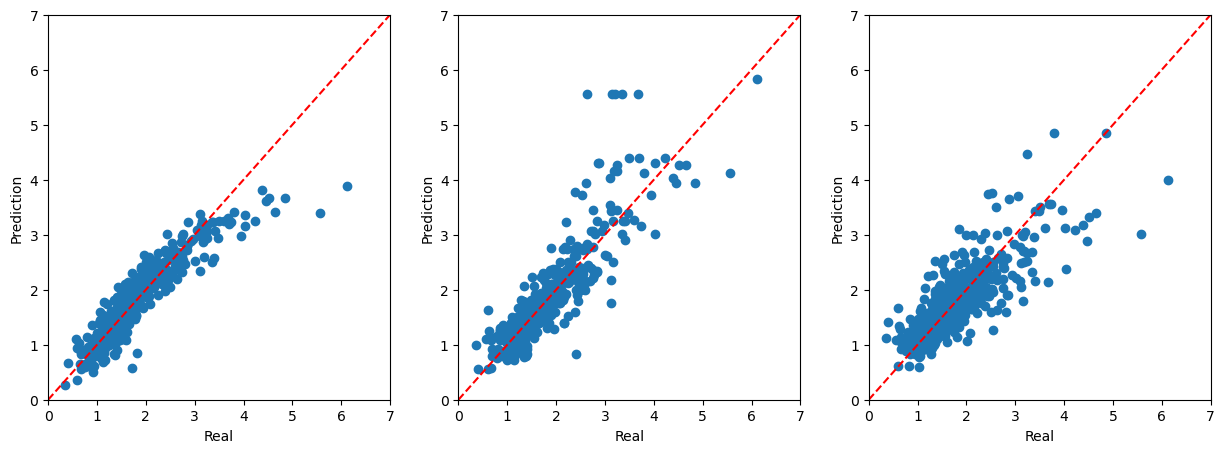

In [49]:
#creating a graph
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].scatter(y_test/100000, y_lr/100000)
ax[0].plot([0,700000], [0,700000], '--r')
ax[1].scatter(y_test/100000, y_rt/100000)
ax[1].plot([0,700000], [0,700000], '--r')
ax[2].scatter(y_test/100000, y_knn/100000)
ax[2].plot([0,700000], [0,700000], '--r')

ax[0].set(xlim=(0, 7), ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Prediction')
ax[1].set(xlim=(0, 7), ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Prediction')
ax[2].set(xlim=(0, 7), ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Prediction')

plt.show()

##### I'm going to use Linear Regression because it was the algorithm with the lowest mean square error, the same metric evaluated by Kaggle when classifying the models.

#### Making the prediction the competition's test base

In [50]:
#importing a test database
testdb = pd.read_csv('test.csv')

In [52]:
#view
testdb.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [54]:
#deleting the same columns from the training base
testdb = testdb.drop(eliminate, axis=1)

In [55]:
#selecting only numerical data
col2 = testdb.columns[testdb.dtypes != 'object']
col2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [56]:
#keeping only the numeric columns
testdb = testdb.loc[:, col2]

In [57]:
#checking the remaining base
testdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [59]:
#visualizing the number of null values
testdb.isnull().sum().sort_values(ascending = False).head(10)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
dtype: int64

##### I'll need to remove the empty values because the linear regression won't be able to work with empty values.
<ul>
    <li>If I try to use this base, it will return an <strong>error</strong> saying that the <strong>input has NaN values</strong></li>
</ul>

In [60]:
#replacing null values with -1
testdb = testdb.fillna(-1)

##### Now I can use my model and adjust the data to use in kaggle

In [61]:
#I'll use knn to make the prediction
y_pred = reg_lr.predict(testdb)

In [62]:
#I can add this prediction column to my database
testdb['SalePrice'] = y_pred

In [64]:
#and extract only the ID and SalePrice
result = testdb[['Id', 'SalePrice']]

In [65]:
#and now I can export this database
result.to_csv('result.csv', index = False)